 __EDA FOR HABERMAN DATA SET__

__Objective__
                To predict the survival of patients after 5 years with the 
                help of age, year of treatment and positive lymph nodes. 

1.__DATA INFORMATION__: The Haberman dataset consists data regarding cancer patients in the university of chicago's
                  Billings hospital. This study contains datapoints regarding survival of the  people for breast 
                  cancer surgery.

__FEATURES__:
            age of the patient:number.
            time of the patient operated:number.
            number of positive axillary nodes detected:number.
            survival status(class attribute):1=lived 5 or more years, 2=died less then 5 years.
                  

In [2]:
#importing the requried packages.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [3]:
#loading the dataset.
#coloums have to be explicitly provided as csv file doesnt contain any table header.
haberman_set=pd.read_csv(r"C:\Users\sreetej\Downloads\New folder (3)\haberman.csv",\
                        header=None,names=["age","year","positive_lymph_node","survival"])
print(haberman_set.head())

   age  year  positive_lymph_node  survival
0   30    64                    1         1
1   30    62                    3         1
2   30    65                    0         1
3   31    59                    2         1
4   31    65                    4         1


2.__DATA VALIDATION__

In [4]:
print(haberman_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                    306 non-null int64
year                   306 non-null int64
positive_lymph_node    306 non-null int64
survival               306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


__OBSERVATIONS__<br>
                  1.There are total 306 entries with 4 columns.<br>
                  2.There are no missing points in the data.
                  

In [5]:
#printing unique classifier values
print(haberman_set.survival.unique())

[1 2]


__3.STATISTICAL INFO__

In [6]:
print(haberman_set.describe())

              age        year  positive_lymph_node    survival
count  306.000000  306.000000           306.000000  306.000000
mean    52.457516   62.852941             4.026144    1.264706
std     10.803452    3.249405             7.189654    0.441899
min     30.000000   58.000000             0.000000    1.000000
25%     44.000000   60.000000             0.000000    1.000000
50%     52.000000   63.000000             1.000000    1.000000
75%     60.750000   65.750000             4.000000    2.000000
max     83.000000   69.000000            52.000000    2.000000


In [7]:
print('number of columns'+str(haberman_set.shape[1]))
print('number of rows'+str(haberman_set.shape[0]))
print("columns"+str(haberman_set.columns))
print("the target values")
print(haberman_set.iloc[:,-1].value_counts(normalize=True))

number of columns4
number of rows306
columnsIndex(['age', 'year', 'positive_lymph_node', 'survival'], dtype='object')
the target values
1    0.735294
2    0.264706
Name: survival, dtype: float64


__Observation__<br>
            1.The age of the patients vary from 30 to 83 yrs with an average of 52 yrs.<br>
            2.despite the overwhelming number of maximum positive nodes of 53,75% of the patients only had less than 5.<br>
            3.the target column is imbalanced with 73% of people fortunately survived.        

__Objective__
                To predict the survival of patients after 5 years with the 
                help of age year od admission and positive lymph nodes. 

4.__UNIVARIATE ANALYSIS__

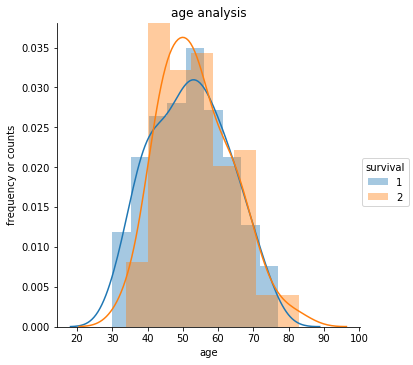

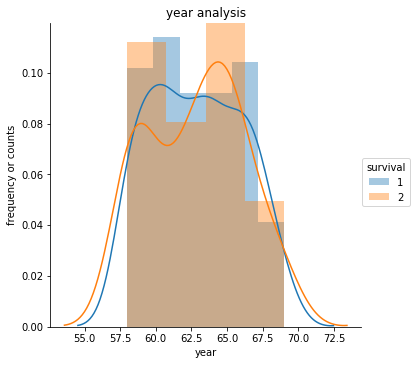

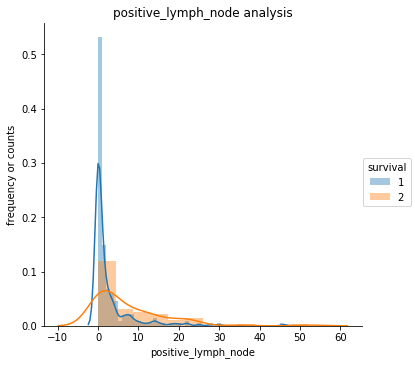

In [39]:
#Density function and histograms
header=haberman_set.columns[:-1]
for q,var in enumerate(header):
    sb.FacetGrid(haberman_set,hue="survival",size=5)\
    .map(sb.distplot,var)\
    .add_legend()
    plt.ylabel("frequency or counts")
    plt.title(str(var)+" analysis")

__Observations__(age,year,lymphnode analysis)<br>
                1.There is too much of overlapping in age between dead and living people(age analysis)(fig-1)<br>
                2.year of treatment also seems to have less effect on people's survival.(year analysis)(fig-2)<br>
                3.positive lymph node seems to have an impact on patient's survival.(fig-3)

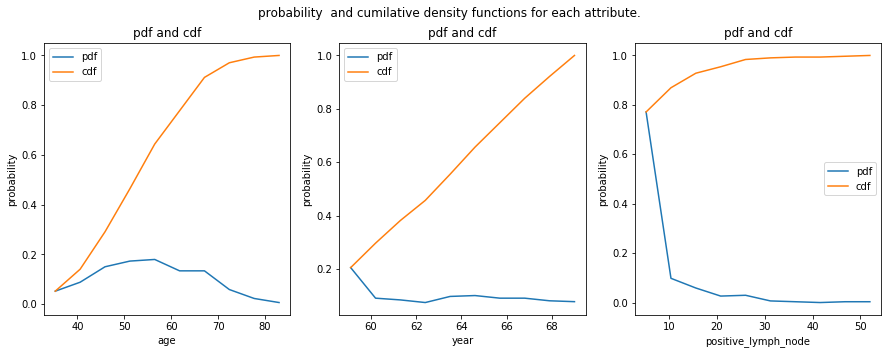

In [24]:
#probability density and cumilative density functions.
plt.figure(figsize=(15,5))
for s,i in enumerate(header):
    count,bin_edges=np.histogram(haberman_set[i],bins=10,density=True)
    pdf=count/sum(count)
    cdf=np.cumsum(pdf)
    plt.subplot(1,3,s+1)
    plt.plot(bin_edges[1:],pdf,label="pdf")
    plt.plot(bin_edges[1:],cdf,label="cdf")
    plt.xlabel(i)
    plt.ylabel("probability")
    plt.title("pdf and cdf")
    plt.legend()
plt.suptitle("probability  and cumilative density functions for each attribute.")
plt.show()
    

__Observations:__<br>
        1.there is a uniform pdf trend in year of treatment from 1962 to 68 which says almost equal number of<br>
        patients attented in this timespan periodically.<br>
        2.too many patients have 5 or less positive lymph nodes.

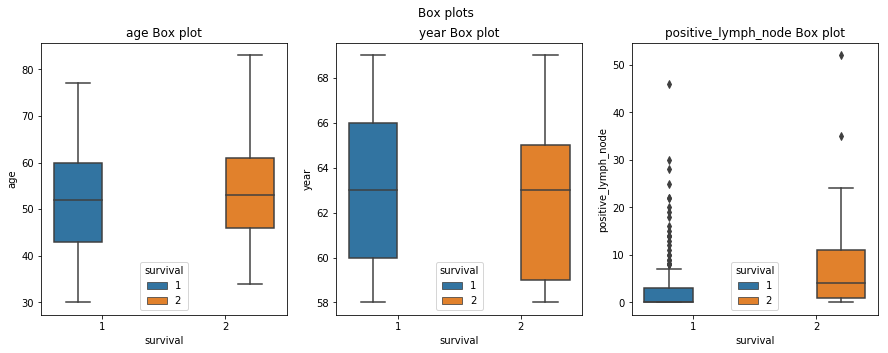

In [51]:
#Box plots
fig,axis=plt.subplots(1,3,figsize=(15,5))
for d,k in enumerate(header):
    sb.boxplot(x='survival',y=haberman_set[k],hue="survival",data=haberman_set,ax=axis[d])
    axis[d].set_title(str(k)+" Box plot")
plt.suptitle("Box plots")    
plt.show()

__Observations__<br>
                1.patients with more than 10 nodes have very less chance of survival.<br>
                2.the median of lymph nodes of patients who died is equal to 75 th percentile value in the<br>
                   patients who lived.

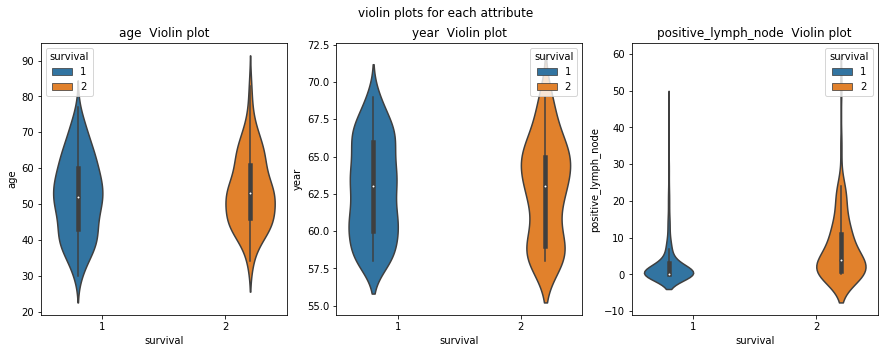

In [53]:
#Violin plots
fig,axis=plt.subplots(1,3,figsize=(15,5))
for e,j in enumerate(header):
    sb.violinplot(x='survival',y=haberman_set[j],hue="survival",data=haberman_set,ax=axis[e])
    axis[e].set_title(str(j)+"  Violin plot")
plt.suptitle("violin plots for each attribute")
plt.show()

__Observations__<br>
1.positive lymph nodes can be a factor of deciding a patients survival.<br>
2.the positive lymph nodes were highly densed within 10 nodes for survivors.<br>
3.patients with more than 10 nodes have very less chance of survival.<br>
4.all patients treated after 1965 have survived. <br>
5.age have less significance for predicting the survival.

__5.BIVARIATE ANALYSIS__

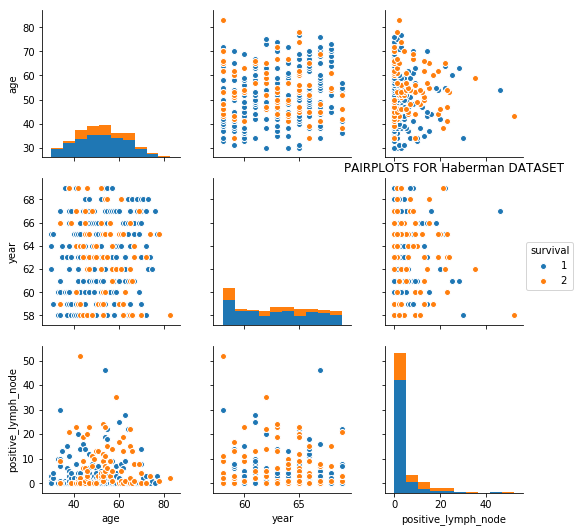

In [61]:
sb.pairplot(haberman_set,vars=header\
           ,hue="survival" )
plt.title("PAIRPLOTS FOR Haberman DATASET")
plt.show()

__Observations__

1.No graph can be separated without an error of 30% or more.but year of treatment and number of positive lymph nodes 
is the best graph for separating the target values.